In [ ]:
import pandas as pd
import numpy as np

# Load your dataset
df = pd.read_csv('/content/Salaries.csv')


# **Basic Data Exploration**

In [ ]:
df.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [ ]:
df.tail()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
148649,148650,Roy I Tillery,Custodian,0.0,0.0,0.00,0.0,0.00,0.00,2014,NaN,San Francisco,NaN
148650,148651,Not provided,Not provided,NaN,NaN,NaN,NaN,0.00,0.00,2014,NaN,San Francisco,NaN
148651,148652,Not provided,Not provided,NaN,NaN,NaN,NaN,0.00,0.00,2014,NaN,San Francisco,NaN
148652,148653,Not provided,Not provided,NaN,NaN,NaN,NaN,0.00,0.00,2014,NaN,San Francisco,NaN
148653,148654,Joe Lopez,"Counselor, Log Cabin Ranch",0.0,0.0,-618.13,0.0,-618.13,-618.13,2014,NaN,San Francisco,NaN


In [ ]:
df.columns

Index(['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Notes', 'Agency',
       'Status'],
      dtype='object')

In [ ]:
df.shape

(148654, 13)

In [ ]:
df.dtypes

Id                    int64
EmployeeName         object
JobTitle             object
BasePay             float64
OvertimePay         float64
OtherPay            float64
Benefits            float64
TotalPay            float64
TotalPayBenefits    float64
Year                  int64
Notes               float64
Agency               object
Status              float64
dtype: object

In [ ]:
df.isnull().sum()

Id                       0
EmployeeName             0
JobTitle                 0
BasePay                609
OvertimePay              4
OtherPay                 4
Benefits             36163
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              148654
dtype: int64

In [ ]:
df=df.drop(['Id','Notes','Status'],axis=1)
df.head(1)

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency
0,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,NaN,567595.43,567595.43,2011,San Francisco


# **Descriptive Statistics**

In [ ]:
df.describe()

,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
count,148045.000000,148650.000000,148650.000000,112491.000000,148654.000000,148654.000000,148654.000000
mean,66325.448840,5066.059886,3648.767297,25007.893151,74768.321972,93692.554811,2012.522643
std,42764.635495,11454.380559,8056.601866,15402.215858,50517.005274,62793.533483,1.117538
min,-166.010000,-0.010000,-7058.590000,-33.890000,-618.130000,-618.130000,2011.000000
25%,33588.200000,0.000000,0.000000,11535.395000,36168.995000,44065.650000,2012.000000
50%,65007.450000,0.000000,811.270000,28628.620000,71426.610000,92404.090000,2013.000000
75%,94691.050000,4658.175000,4236.065000,35566.855000,105839.135000,132876.450000,2014.000000
max,319275.010000,245131.880000,400184.250000,96570.660000,567595.430000,567595.430000,2014.000000


In [ ]:
salary_range = df['TotalPay'].max() - df['TotalPay'].min()
print(salary_range)

568213.56


In [ ]:
salary_range = df['BasePay'].max() - df['BasePay'].min()
print(salary_range)

319441.02


# **Data Cleaning**

In [ ]:
numerical_columns = ['BasePay', 'OvertimePay', 'OtherPay','Benefits']
for column in numerical_columns:
    df[column].fillna(df[column].median(), inplace=True)

In [ ]:
df.isnull().sum()

EmployeeName        0
JobTitle            0
BasePay             0
OvertimePay         0
OtherPay            0
Benefits            0
TotalPay            0
TotalPayBenefits    0
Year                0
Agency              0
dtype: int64

# **Basic Data Visualization**

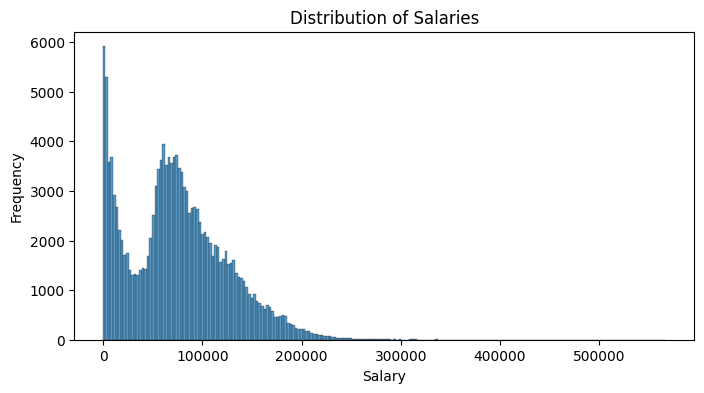

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 4))
sns.histplot(df['TotalPay'])
plt.title('Distribution of Salaries')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()

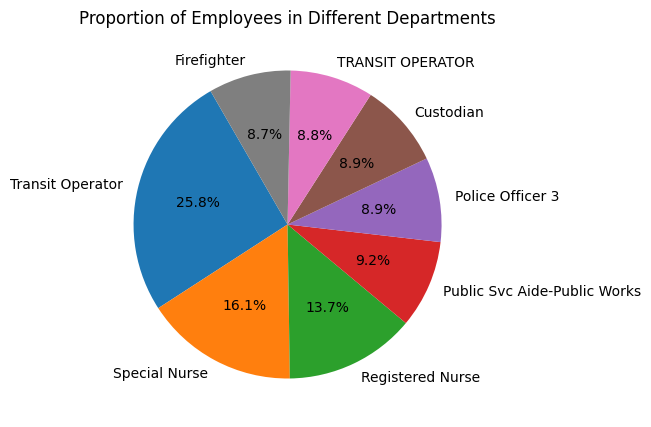

In [ ]:
# Count the number of employees in each department
department_counts = df['JobTitle'].value_counts().head(8)
# Create a pie chart
plt.figure(figsize=(5, 5))
plt.pie(department_counts, labels=department_counts.index, autopct='%1.1f%%', startangle=120)
plt.title('Proportion of Employees in Different Departments')
plt.show();

# **Grouped Analysis**

In [ ]:
grouped_data = df.groupby(['JobTitle', 'Year']).agg({
    'TotalPay': ['mean', 'min', 'max', 'std', 'count']
}).reset_index()

print(grouped_data.head())

                      JobTitle  Year      TotalPay                      \
                                              mean       min       max   
0                ACCOUNT CLERK  2011  44035.664337    614.00  60838.20   
1                   ACCOUNTANT  2011  47429.268000   1148.40  65392.01   
2            ACCOUNTANT INTERN  2011  29031.742917   2981.53  58799.53   
3  ACPO,JuvP, Juv Prob (SFERS)  2014  62290.780000  62290.78  62290.78   
4                ACUPUNCTURIST  2011  67594.400000  67594.40  67594.40   

                       
            std count  
0  13170.742908    83  
1  27137.331315     5  
2  20711.322649    48  
3           NaN     1  
4           NaN     1  


# **Simple Correlation Analysis**

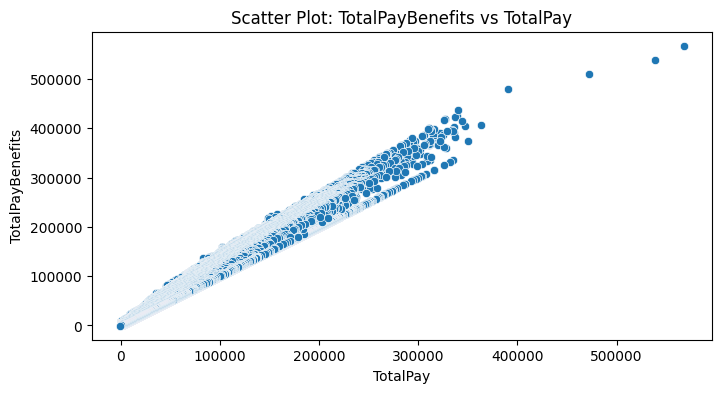


Correlation coefficient between TotalPayBenefits and TotalPay: 0.9773128522072129


In [ ]:
correlation = df['TotalPayBenefits'].corr(df['TotalPay'])

plt.figure(figsize=(8, 4))
sns.scatterplot(x='TotalPay', y='TotalPayBenefits', data=df)
plt.title(f'Scatter Plot: TotalPayBenefits vs TotalPay')
plt.xlabel('TotalPay')
plt.ylabel('TotalPayBenefits')
plt.show()

print(f"\nCorrelation coefficient between TotalPayBenefits and {'TotalPay'}: {correlation}")


# **Summary of Insights**

 1. Dataset is to understand how San Francisco pays it's employees and tell us about how the city headquartered in runs.
 2. In features{'Notes' 'Status'} there is no data in them and the {'Id'} doesn't represent a feature so there is no information gained from them so they were dropped.
 3. There are three features {'BasePay' 'OvertimePay' 'OtherPay' 'Benefits'} that have some missing data that was found so we fill them with median values.
 4. we used the histogram to find the distribution of salaries skewed to the right side
 5. we used pie chart to find the Proportion of Employees in Different Departments with most comman department being transit operator

 6. we find positive correlation between TotalPayBenefits and TotalPay